In [1]:
# @http://web.econ.ku.dk/klemp/

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
grid = 200
xmin = 0
ymin = 0
xmax = 5
ymax = 7

a = 7
b = 0.33
p = -4.0
d = 0.6
h = 0
m = 8
rho = 0.4
n = 0.2

Dd = 1
De = 1
Df = 1
Dg = 1

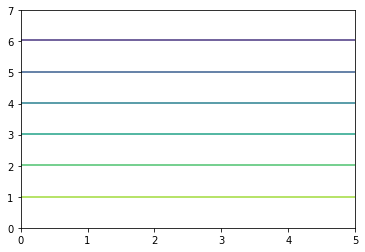

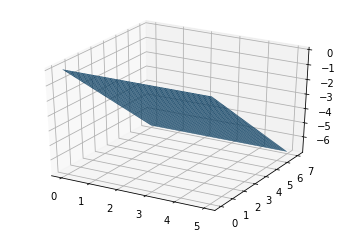

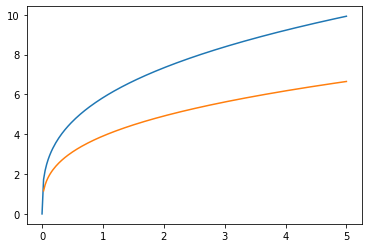

In [12]:
# Setup grid
x, y = np.meshgrid(np.linspace(xmin, xmax, grid), np.linspace(ymin, ymax, grid))

z = np.zeros([grid, grid])

for i in range(grid): # FIX - might have to shift back one index because python arrays start at 0
    for j in range(grid):
        z[j][i] = G(xmin + i * (xmax - xmin) / grid, ymin + j * (ymax - ymin) / grid)

# Plot the thing
plt.contour(x, y, z)
plt.x_label = "k_t"
plt.show()

fig = plt.figure()
ax2 = plt.axes(projection="3d")
ax2.plot_surface(x, y, z)
plt.show()

# Plot individual funtions

# Line f and W
ax = plt.axes()
x_new = np.linspace(xmin, xmax, grid)
yf = f(np.linspace(xmin, xmax, grid)) / (1 + n)
wf = W(np.linspace(xmin, xmax, grid)) / (1 + n)
ax.plot(x_new, yf)
ax.plot(x_new, wf)
plt.show()

In [4]:
def G(k_t, k_tplus1):
    return S(W(k_t), R(k_tplus1)) / (1 + n) - k_tplus1

In [5]:
def S(W, R):
    try:
        utility = U(np.linspace(0, W, grid), W, R) # Calculate the utility function for a range of values # Potentially W / grid instead of W in the linspace function but doubt it

        # Find the max utility value along with its index
        max_utility = max(utility)
        max_utility_index = utility.index(max_utility)

        return max_utility_index * W / grid
    except TypeError:
        return 0

In [6]:
def W(k):
    try:
        return f(k) - k * (a * b * k ** (b - 1))
    except ZeroDivisionError:
        return None

In [7]:
def f(k):
    try:
        return a * k ** b
    except ZeroDivisionError:
        return None

In [8]:
def R(k):
    try:
        return a * b * k ** (b - 1) - d
    except ZeroDivisionError:
        return None    

In [9]:
def U(S, W, R):
    try: 
        Utility_temp = v1(W - S) + v2((1 + R) * S) / (1 + rho)

        return Utility_temp
    except TypeError:
        pass

In [10]:
def v1(c):
    # Input is meant to be a list?
    for i in range(len(c)):
        if Dd + De * c[i] > 0: 
            return np.log(Dd + De * c[i])
        else:
            return None

In [11]:
def v2(c):
    # Input is meant to be a list?
    for i in range(len(c)):
        if Df + Dg * c[i] > 0: 
            return np.log(Df + Dg * c[i])
        else:
            return None